# SEABORN VISUALITATION

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Data/Pokemon.csv', sep =",")

In [132]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Countplot with all pokemons by generation

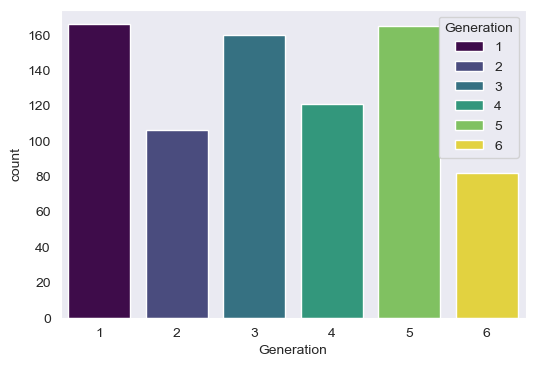

In [133]:
fig, ax = plt.subplots(figsize=(6,4))
sns.set_style('dark')
sns.countplot(x="Generation",
              hue="Generation",
              data=df, palette="viridis")
plt.show()

## Frequency by type 1 in a barchart

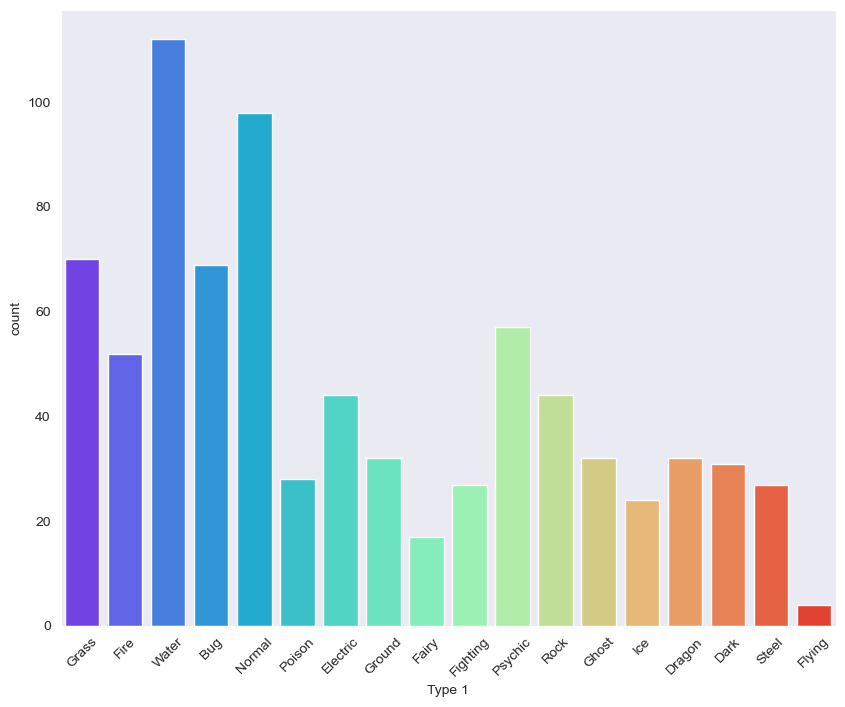

In [134]:
fig, ax= plt.subplots(figsize=(10,8))
sns.countplot(x='Type 1',
             data=df,
             hue = 'Type 1',
             palette='rainbow')
plt.xticks(rotation=45)
plt.show()

## Barchart with pokemons type 1 equel to 'Grass' or 'Fire' 

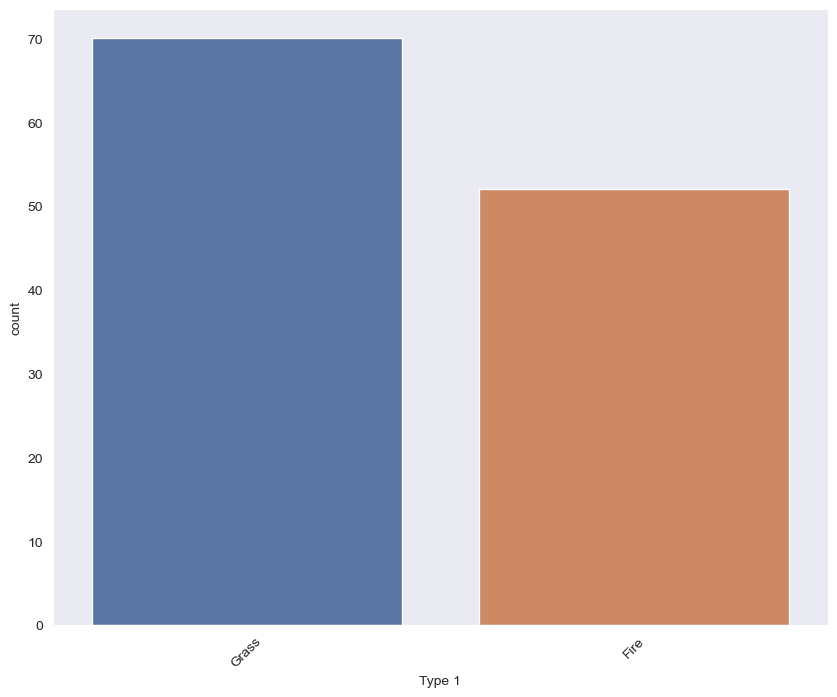

In [135]:
filterdf = df[df['Type 1'].isin(['Grass', 'Fire'])]
fig, ax= plt.subplots(figsize=(10,8))
sns.countplot(x='Type 1',
             data=filterdf,
             hue = 'Type 1',
             palette='deep'
             )
plt.xticks(rotation=45)
plt.show()

## Health Points Histogram

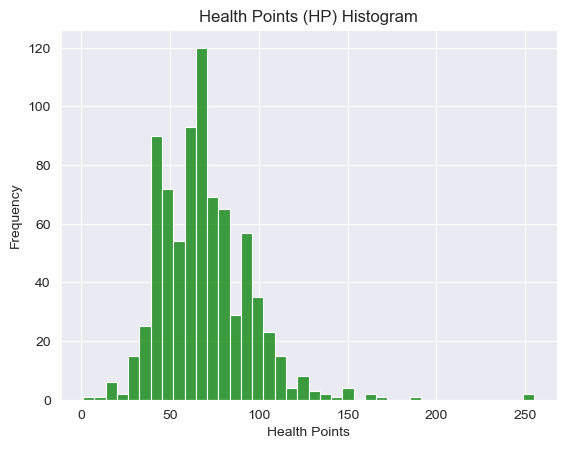

In [136]:
sns.histplot(data=df, x="HP",color='green', bins=40)
plt.title('Health Points (HP) Histogram')
plt.xlabel('Health Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Speed Histogram

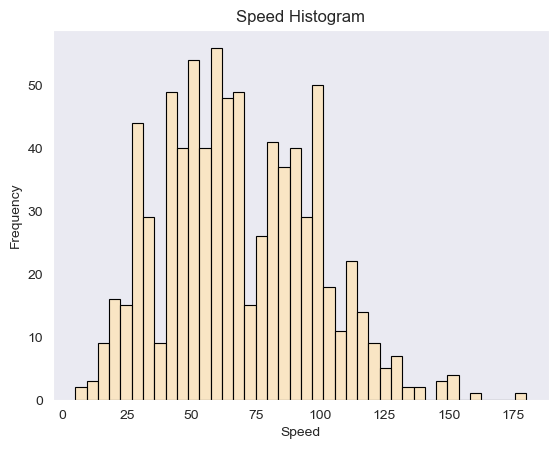

In [137]:
sns.histplot(data=df ,x='Speed', bins=40, color='moccasin', edgecolor='black')
plt.title('Speed Histogram')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

##  HealthPoints from pokemons Type 1 that are Fire

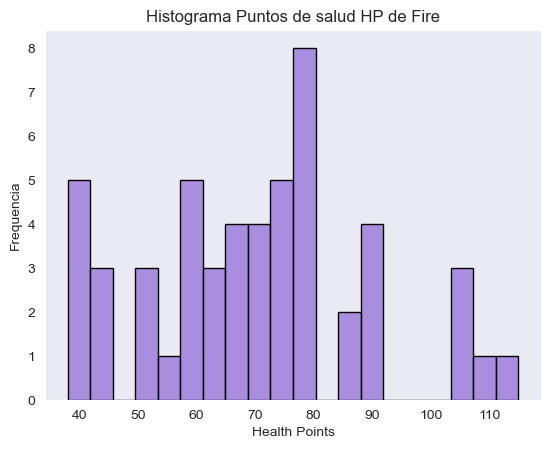

In [138]:
dfFire =df[df['Type 1']== "Fire"]
#plt.hist(dfFire['HP'], bins=20, color='green', edgecolor='black')
sns.histplot(data =dfFire, x='HP', bins=20, color='mediumpurple', edgecolor='black')
plt.title('Histograma Puntos de salud HP de Fire')
plt.xlabel('Health Points')
plt.ylabel('Frequencia')

plt.show()

## Pokemon Attack and Defense scatterplot and hex

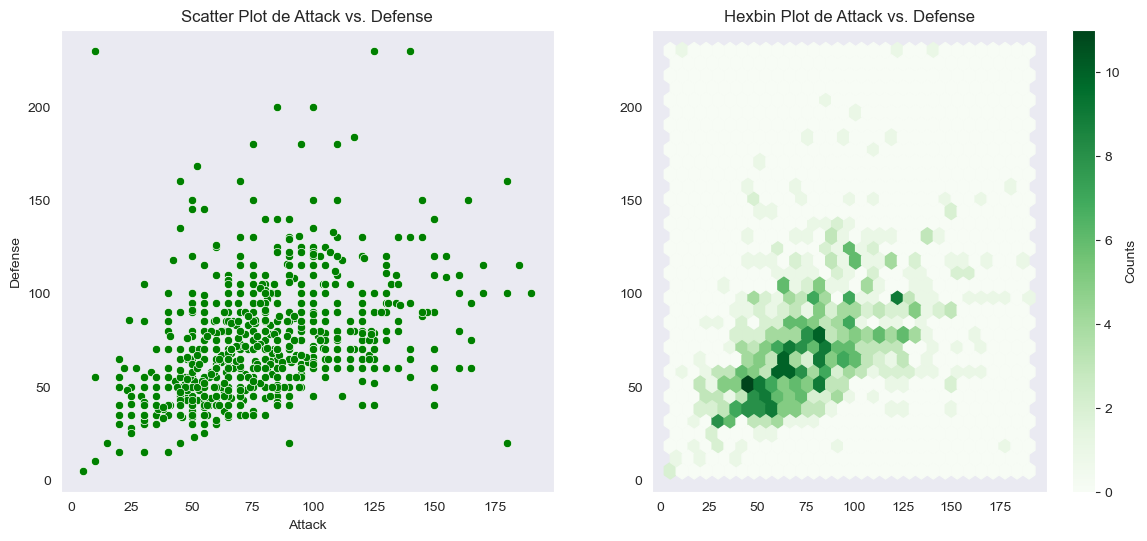

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Scatter plot
sns.scatterplot(x="Attack", y="Defense", data=df, color="Green", ax=axes[0])
axes[0].set_title('Scatter Plot de Attack vs. Defense')

# Hexbin plot
hb = axes[1].hexbin(df["Attack"], df["Defense"], gridsize=30, cmap='Greens')
axes[1].set_title('Hexbin Plot de Attack vs. Defense')

# colorbar for Hexbin plot
cb = fig.colorbar(hb, ax=axes[1], orientation='vertical')
cb.set_label('Counts')

plt.show()

## Scatter Hex graph. "Attack" and "Defense" from pokemons type "Water" and "Fire"

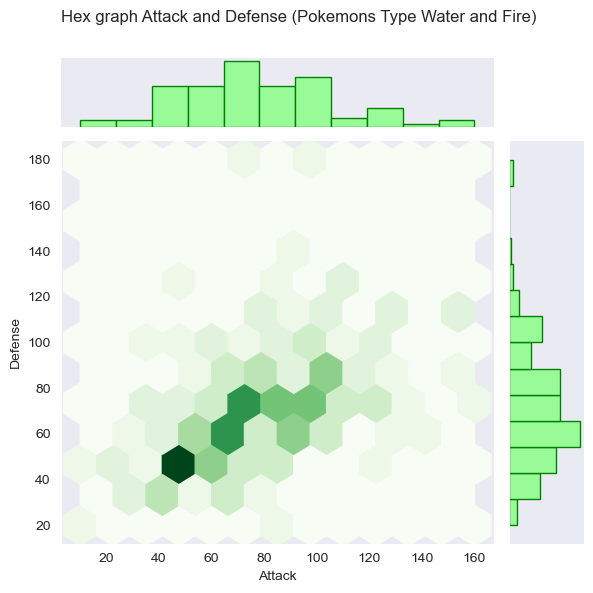

In [140]:
dfwafi = df[df['Type 1'].isin(['Water', 'Fire'])]
g = sns.jointplot(x='Attack', y='Defense', kind='hex', data=dfwafi, cmap='Greens')

# make custom little barcharts
g.ax_marg_x.hist(dfwafi['Attack'], bins=11, color='palegreen', edgecolor='green')
g.ax_marg_y.hist(dfwafi['Defense'], bins=14, orientation='horizontal', color='palegreen', edgecolor='green')

# Title with more space in the top area
plt.subplots_adjust(top=0.9) 
g.fig.suptitle('Hex graph Attack and Defense (Pokemons Type Water and Fire)')

plt.show()


## Pokemopns Health and Attack KDE

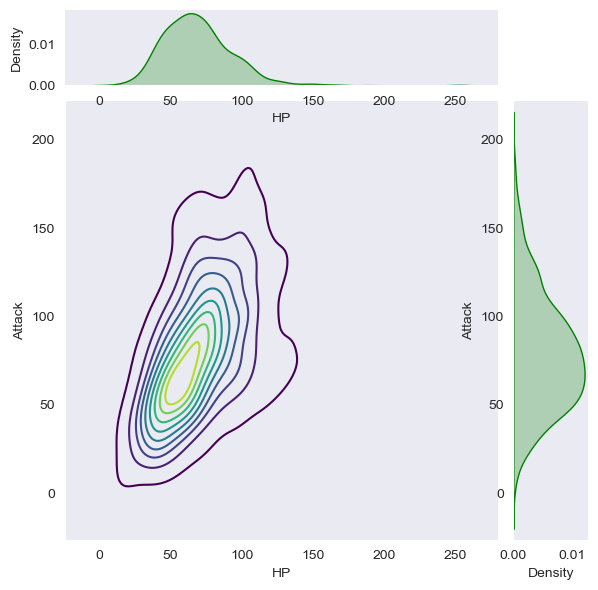

In [141]:
h =sns.jointplot(x='HP', y='Attack', kind='kde', data=df, cmap='viridis')
# make custom little barcharts
h.ax_marg_x.clear()
h.ax_marg_y.clear()
sns.kdeplot(df['HP'], ax=h.ax_marg_x, color='green', fill=True)
sns.kdeplot(y= df['Attack'], ax=h.ax_marg_y, color='green', fill=True)
plt.show()

## Legendary and no legendary boxplot.

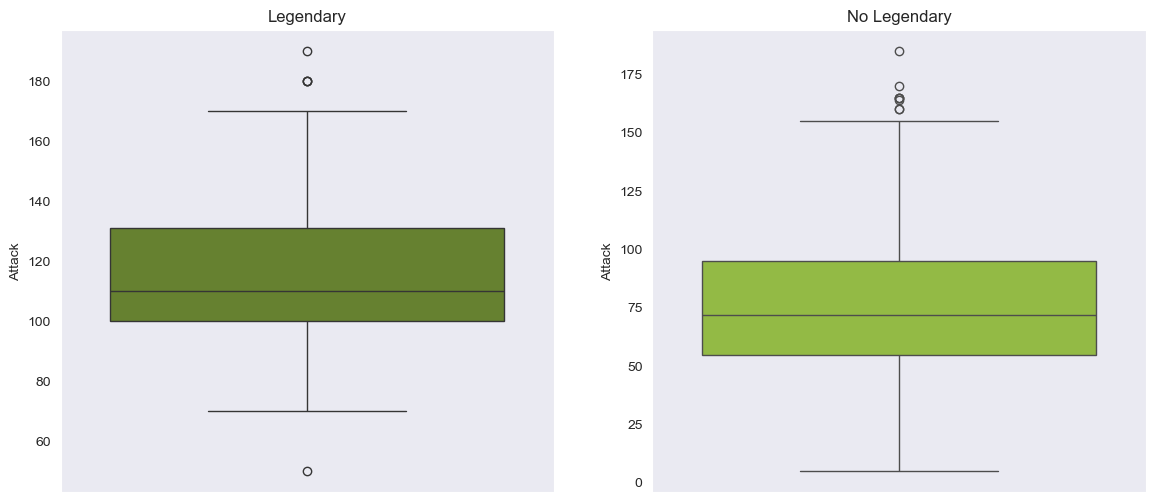

In [142]:
df.head()
dflegen=df[df['Legendary']==True]
dfnolegen=df[df['Legendary']==False]
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.boxplot(ax= ax[0], y='Attack',color= 'olivedrab', data=dflegen)
ax[0].set_title('Legendary')
sns.boxplot(ax= ax[1], y='Attack',color= 'yellowgreen', data=dfnolegen)
ax[1].set_title('Non Legendary')
plt.show()

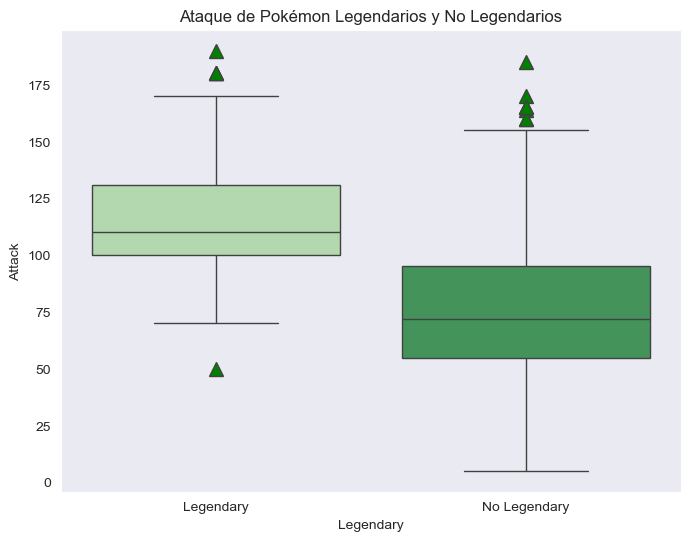

In [143]:

# inside a single graph
df_copy = df.copy()
df_copy['Legendary'] = pd.Categorical(df_copy['Legendary'], categories=[True, False], ordered=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Legendary', y='Attack', data=df_copy, palette='Greens', hue='Legendary',flierprops=dict(marker='^', markerfacecolor='g', markersize=10))
plt.title('Ataque de Pokémon Legendarios y No Legendarios')
plt.legend().remove()
plt.xlabel('Legendary')
plt.ylabel('Attack')
plt.xticks([0, 1], ['Legendary', 'Non Legendary'])  # Etiquetas en el eje x
plt.show()


## Legendary and no Legendary attack violinplot

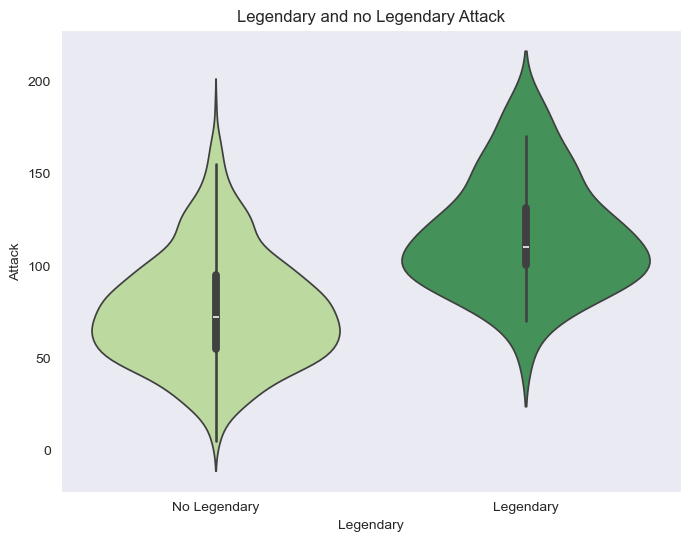

In [144]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Legendary', y='Attack', data=df,hue='Legendary', palette='YlGn')
plt.legend().remove()
plt.title('Legendary and no Legendary Attack')
plt.xlabel('Legendary')
plt.ylabel('Attack')
plt.xticks([0, 1], ['Non Legendary', 'Legendary']) 
plt.show()

## Displot for Legendary and non Legendary by generation

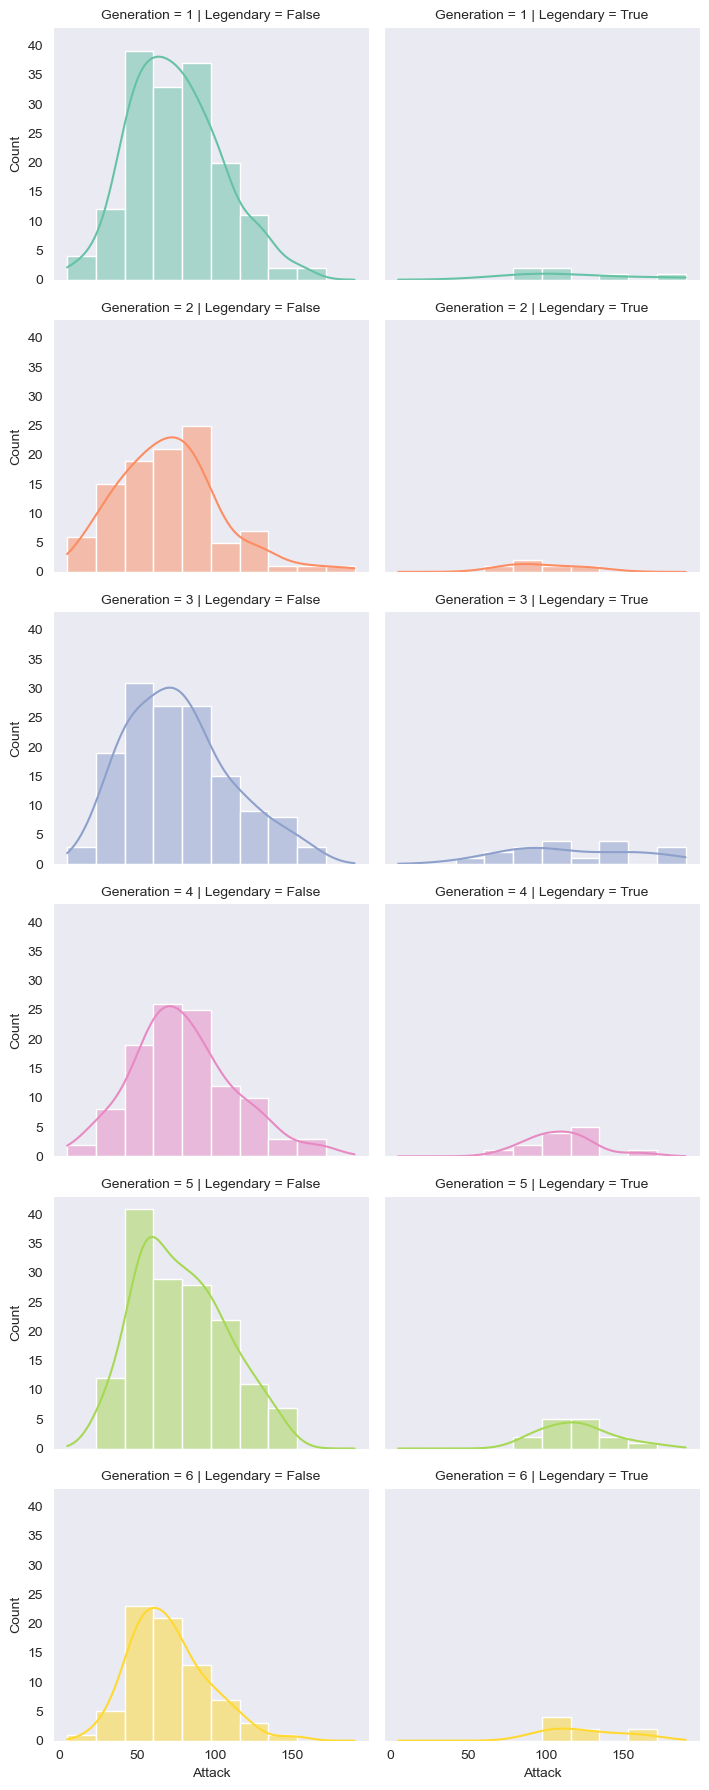

In [145]:
g = sns.displot(data=df, x='Attack', col='Legendary', row='Generation', kind='hist',palette='Set2', hue='Generation', bins=10, kde=True, height=3, aspect=1.2, legend=False)
plt.show()


## Evaluatig Health Points, Attack and Defense with Pairplot

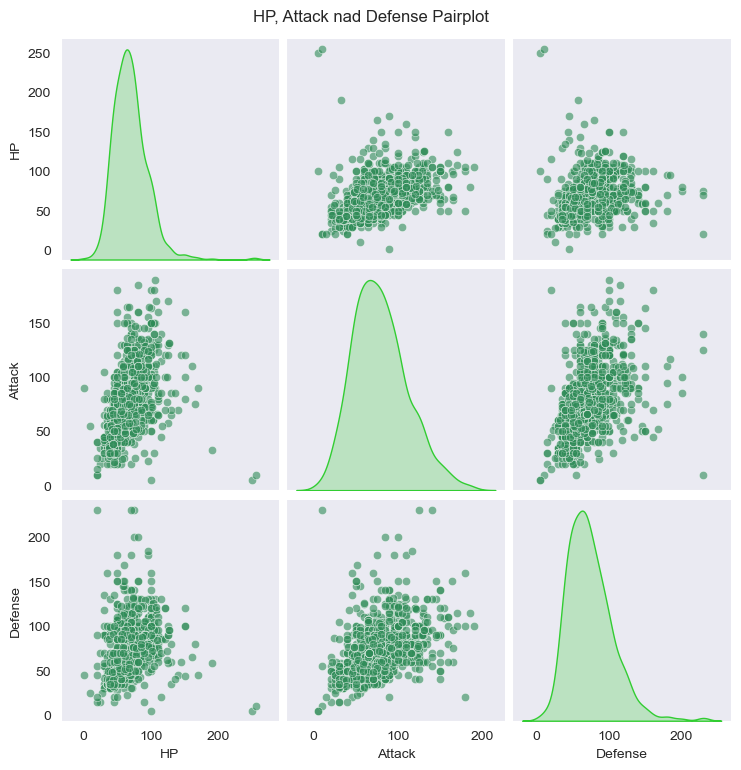

In [174]:
columns_of_interest = ['HP', 'Attack', 'Defense']
sns.pairplot(df[columns_of_interest], diag_kind='kde', diag_kws={'color':'limegreen'}, plot_kws={'alpha': 0.6, 'color':'seagreen'})
plt.suptitle('HP, Attack nad Defense Pairplot', y=1.02)
plt.show()


## Boxplot of 'Total' by generation, distinguishing between legendary and non-legendary.

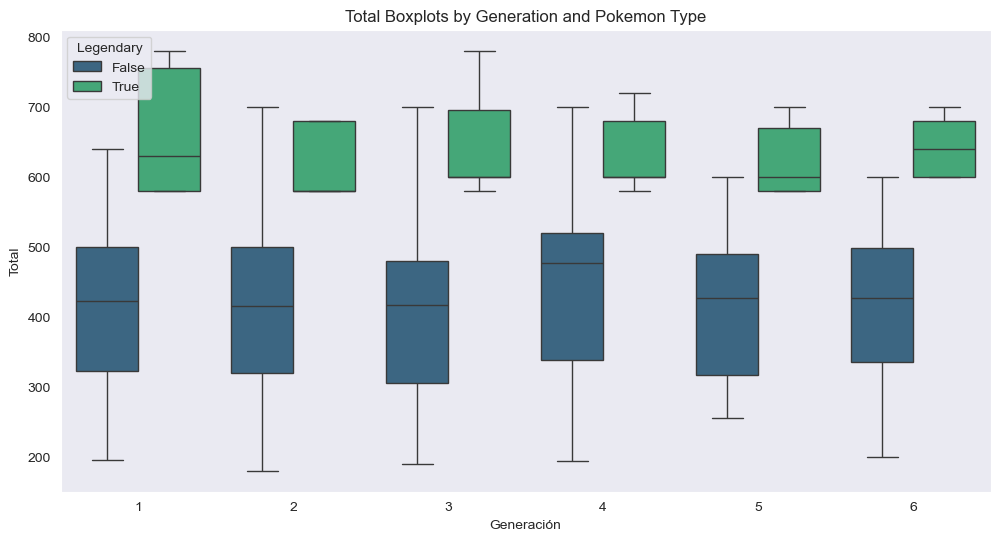

In [176]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Generation', y='Total', hue='Legendary', data=df, palette='viridis')
plt.title('Total Boxplots by Generation and Pokemon Type')
plt.xlabel('Generación')
plt.ylabel('Total')
plt.legend(title='Legendary', loc='upper left')
plt.show()

## Heatmap to compare the evaluate between HP, Attack, Special Attack, Defense, Special Defense, and Speed

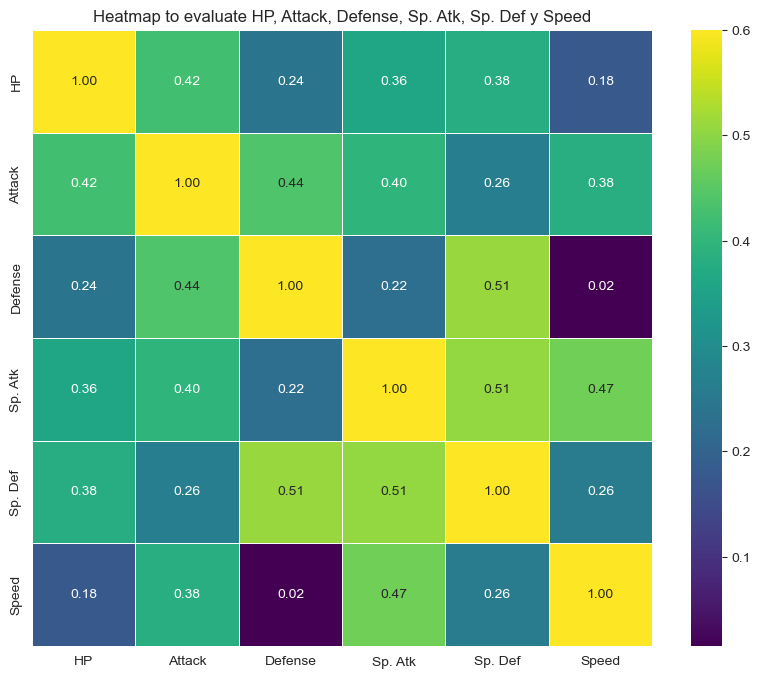

In [182]:
columns_of_interest = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

correlation_matrix = df[columns_of_interest].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, vmax=0.6)
plt.title('Heatmap to evaluate HP, Attack, Defense, Sp. Atk, Sp. Def y Speed')
plt.show()


## Top 5 pokemos in Total column from type "Electric", "Fire", "Water" and evaluate Health Points, Attack, Defense and Speed with a heatmap

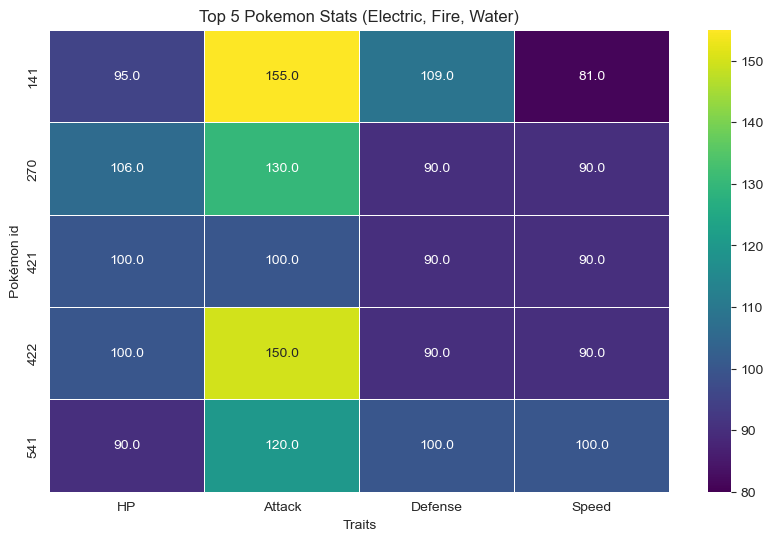

In [184]:
filtered_df = df[df['Type 1'].isin(['Electric', 'Fire', 'Water'])]
sorted_df = filtered_df.sort_values(by='Total', ascending=False)
top_5_pokemon = sorted_df.head(5)

top_5_stats = df[df['Name'].isin(top_5_pokemon['Name'])]

stats_columns = ['HP', 'Attack', 'Defense', 'Speed']
top_5_stats = top_5_stats[stats_columns]


plt.figure(figsize=(10, 6))
sns.heatmap(top_5_stats, annot=True, cmap='viridis', fmt=".1f", linewidths=0.5, vmin=80)
plt.title('Top 5 Pokemon Stats (Electric, Fire, Water)')
plt.xlabel('Traits')
plt.ylabel('Pokémon id')
plt.show()
